In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from scipy import stats
%matplotlib inline

In [2]:
train_eda = pd.read_csv('datasets/train_clean.csv')
test_eda = pd.read_csv('datasets/test_clean.csv')

In [3]:
train_eda.isnull().sum()

Id                   0
MS SubClass          0
MS Zoning            0
Lot Frontage         0
Lot Area             0
Street               0
Land Contour         0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type         0
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         0
Total Bsmt SF        0
Heating QC           0
Central Air          0
Electrical           0
Gr Liv Area          0
Bsmt Full Bath       0
Full Bath            0
Half Bath            0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1000
Garage Type        113
Garage Finish      114
Garage Cars

In [4]:
train_eda["Fireplace Qu"].fillna('NA', inplace=True)
train_eda["Garage Finish"].fillna('NA', inplace=True)
train_eda["Garage Cond"].fillna('NA', inplace=True)
train_eda["Garage Qual"].fillna('NA', inplace=True)
train_eda["Garage Type"].fillna('NA', inplace=True)
train_eda["Bsmt Exposure"].fillna('NA', inplace=True)
train_eda["Bsmt Cond"].fillna('NA', inplace=True)
train_eda["BsmtFin Type 1"].fillna('NA', inplace=True)
train_eda["Bsmt Qual"].fillna('NA', inplace=True)


In [5]:
test_eda["Fireplace Qu"].fillna('NA', inplace=True)
test_eda["Garage Finish"].fillna('NA', inplace=True)
test_eda["Garage Cond"].fillna('NA', inplace=True)
test_eda["Garage Qual"].fillna('NA', inplace=True)
test_eda["Garage Type"].fillna('NA', inplace=True)
test_eda["Bsmt Exposure"].fillna('NA', inplace=True)
test_eda["Bsmt Cond"].fillna('NA', inplace=True)
test_eda["BsmtFin Type 1"].fillna('NA', inplace=True)
test_eda["Bsmt Qual"].fillna('NA', inplace=True)

In [6]:
test_eda.isnull().sum().sum()

0

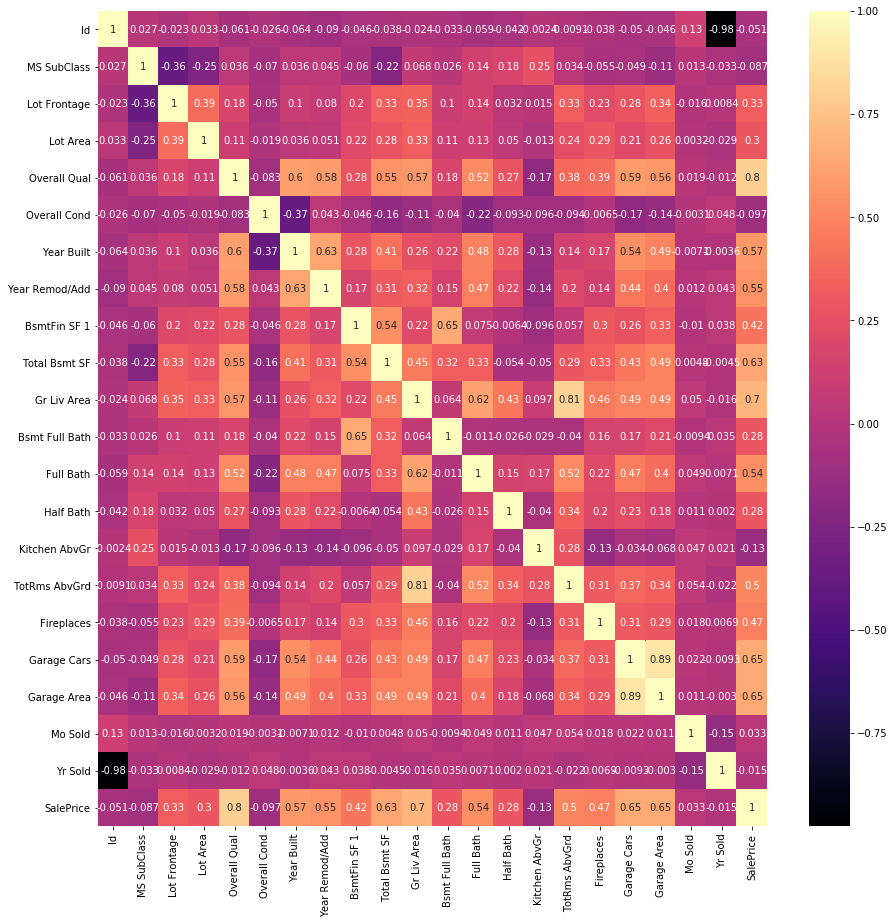

In [7]:
#checking corr values to get an idea of key features 
plt.figure(figsize=(15,15))
sns.heatmap(train_eda.corr(), annot=True, cmap='magma')

In [8]:
train_eda.corr().T

,Id,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,Total Bsmt SF,...,Full Bath,Half Bath,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Mo Sold,Yr Sold,SalePrice
Id,1.000000,0.026543,-0.023004,0.032872,-0.061483,-0.026096,-0.064444,-0.090040,-0.045794,-0.038115,...,-0.059086,-0.042054,-0.002400,-0.009092,-0.037560,-0.049616,-0.046105,0.127723,-0.975747,-0.051398
MS SubClass,0.026543,1.000000,-0.364300,-0.245484,0.035763,-0.070141,0.035983,0.044836,-0.060425,-0.224700,...,0.142087,0.179404,0.252111,0.034490,-0.055118,-0.049426,-0.108423,0.013027,-0.032870,-0.087335
Lot Frontage,-0.023004,-0.364300,1.000000,0.389358,0.182455,-0.049778,0.104603,0.079750,0.197661,0.330782,...,0.138806,0.032340,0.014725,0.332566,0.225710,0.280960,0.339366,-0.016006,0.008399,0.325814
Lot Area,0.032872,-0.245484,0.389358,1.000000,0.105824,-0.019185,0.036002,0.050771,0.215648,0.277478,...,0.125601,0.049995,-0.013484,0.238724,0.289467,0.214839,0.263145,0.003197,-0.029454,0.296566
Overall Qual,-0.061483,0.035763,0.182455,0.105824,1.000000,-0.082770,0.602964,0.584654,0.279223,0.549407,...,0.515080,0.274859,-0.170964,0.382025,0.388920,0.587447,0.563904,0.019242,-0.011578,0.800207
Overall Cond,-0.026096,-0.070141,-0.049778,-0.019185,-0.082770,1.000000,-0.370988,0.042614,-0.046348,-0.159856,...,-0.219189,-0.093266,-0.095725,-0.093576,-0.006463,-0.168733,-0.138174,-0.003144,0.047664,-0.097019
Year Built,-0.064444,0.035983,0.104603,0.036002,0.602964,-0.370988,1.000000,0.629116,0.275728,0.410605,...,0.480169,0.283207,-0.127162,0.137783,0.168848,0.543313,0.488023,-0.007083,-0.003559,0.571849
Year Remod/Add,-0.090040,0.044836,0.079750,0.050771,0.584654,0.042614,0.629116,1.000000,0.167296,0.309795,...,0.471555,0.224106,-0.135926,0.202397,0.138858,0.440365,0.397731,0.011568,0.042744,0.550370
BsmtFin SF 1,-0.045794,-0.060425,0.197661,0.215648,0.279223,-0.046348,0.275728,0.167296,1.000000,0.539251,...,0.075437,-0.006393,-0.096279,0.056657,0.298810,0.260421,0.331252,-0.010151,0.037890,0.423856
Total Bsmt SF,-0.038115,-0.224700,0.330782,0.277478,0.549407,-0.159856,0.410605,0.309795,0.539251,1.000000,...,0.326277,-0.054173,-0.049700,0.294787,0.333643,0.433361,0.488954,0.004837,-0.004470,0.629303


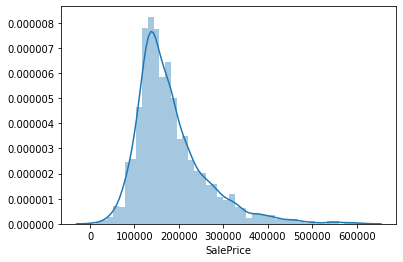

In [9]:
sns.distplot(train_eda['SalePrice'])

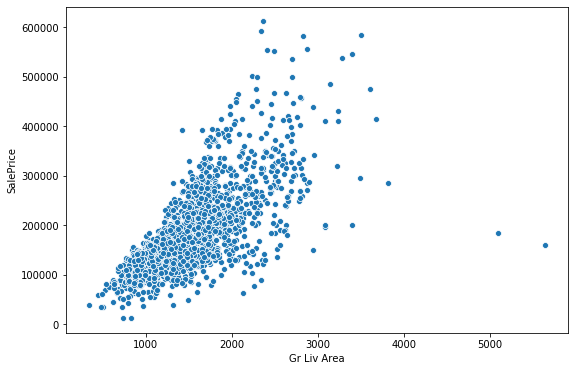

In [10]:
##delving into charts and graphs on data that might be worth exploring for feature analysis
plt.figure(figsize=(9, 6))
sns.scatterplot(x="Gr Liv Area", y="SalePrice", data=train_eda);

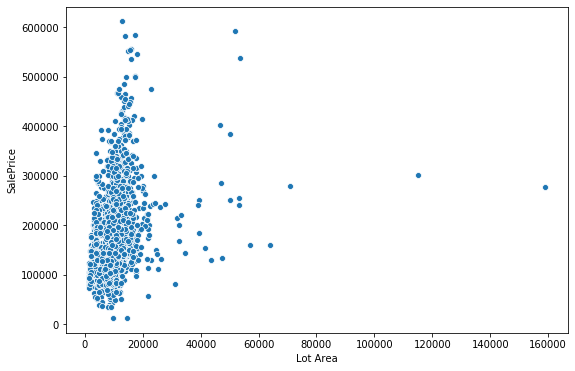

In [11]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x="Lot Area", y="SalePrice", data=train_eda);

Text(0.5, 1.0, 'AC, Slater')

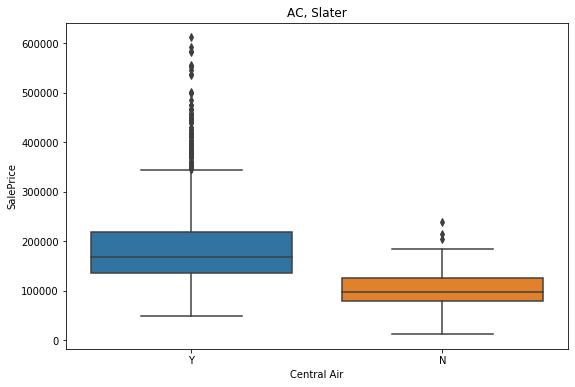

In [12]:
plt.figure(figsize=(9, 6))
sns.boxplot(x="Central Air", y="SalePrice", data=train_eda);
plt.title('AC, Slater', fontsize=12)

In [13]:
#want to visualize spacial features quickly 
spacial = train_eda[['Lot Area', 'Total Bsmt SF', 'Garage Area', 'Gr Liv Area', 'SalePrice']]

In [14]:
spacial.columns

Index(['Lot Area', 'Total Bsmt SF', 'Garage Area', 'Gr Liv Area', 'SalePrice'], dtype='object')

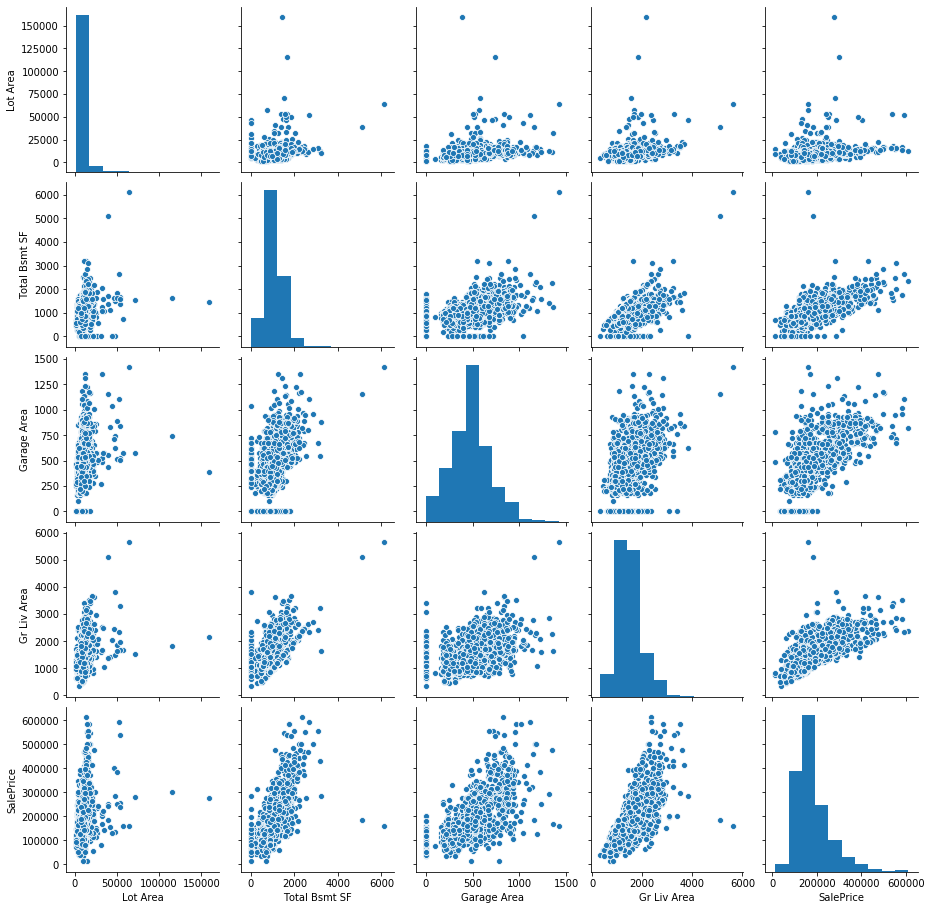

In [15]:
sns.pairplot(spacial)

Text(0.5, 1.0, 'Housing price by neighborhood')

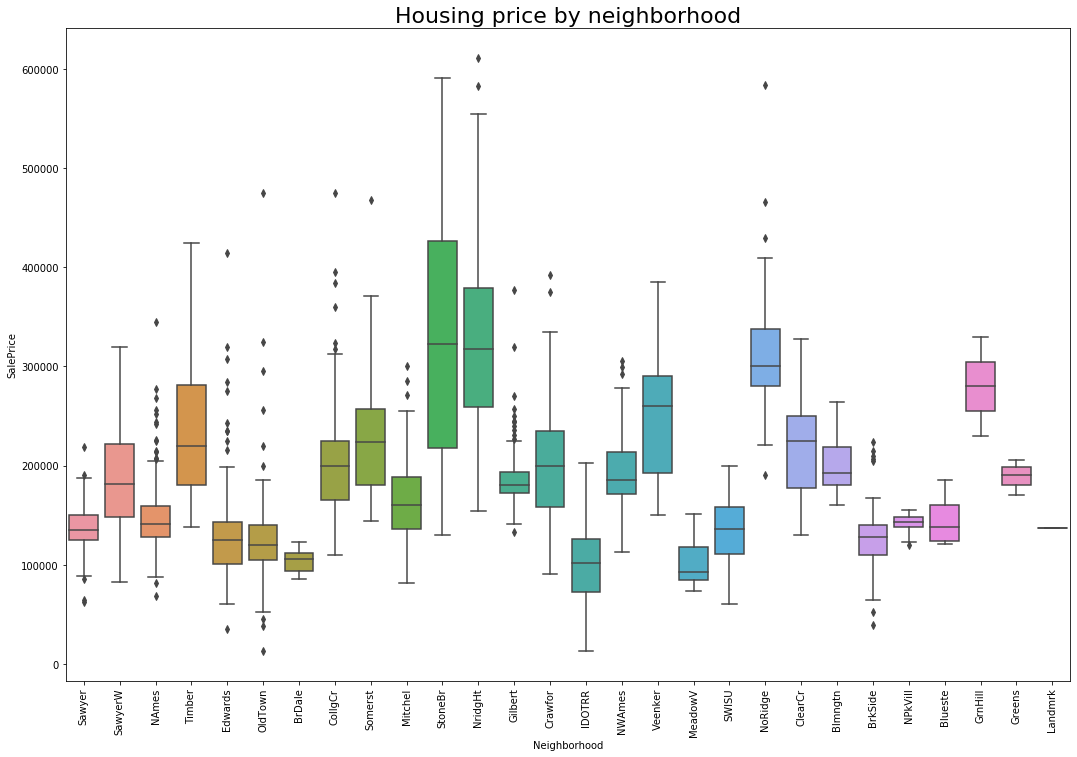

In [16]:
plt.figure(figsize=(18, 12))
ax = sns.boxplot(x="Neighborhood", y="SalePrice", data=train_eda)
plt.xticks(rotation=90) 
plt.title('Housing price by neighborhood', fontsize=22)

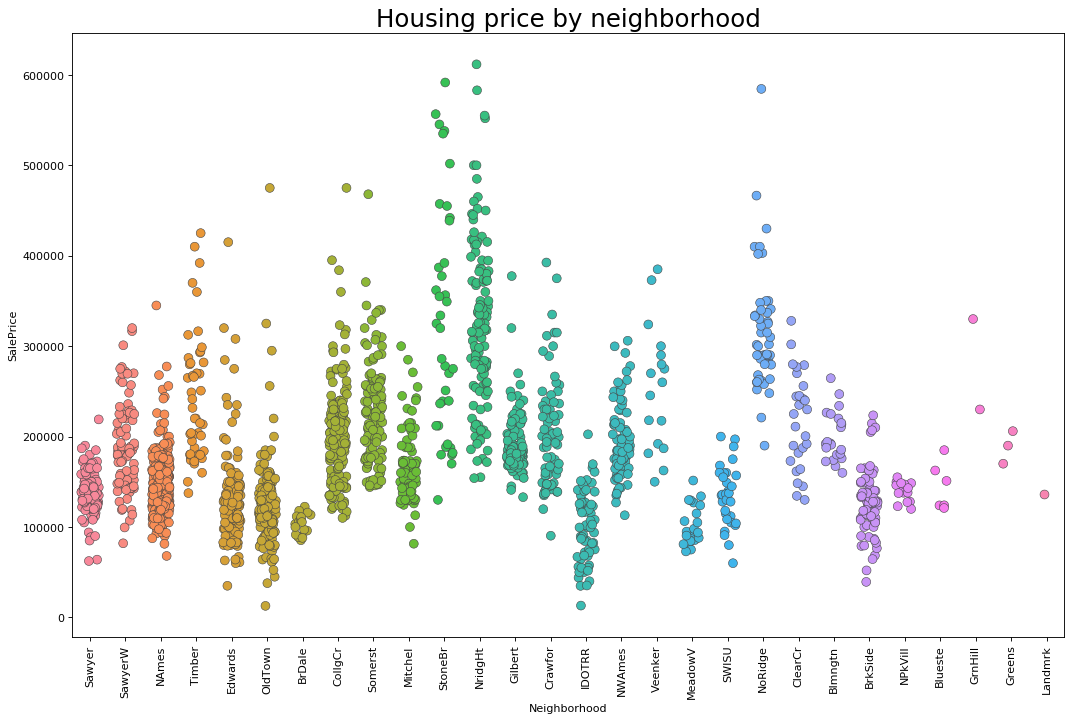

In [17]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(train_eda.Neighborhood, train_eda.SalePrice, jitter=0.25, size=8, ax=ax, linewidth=.5)
plt.xticks(rotation=90) 
plt.title('Housing price by neighborhood', fontsize=22)
plt.show()

Text(0.5, 1.0, 'Overall Quality vs Sale Price ')

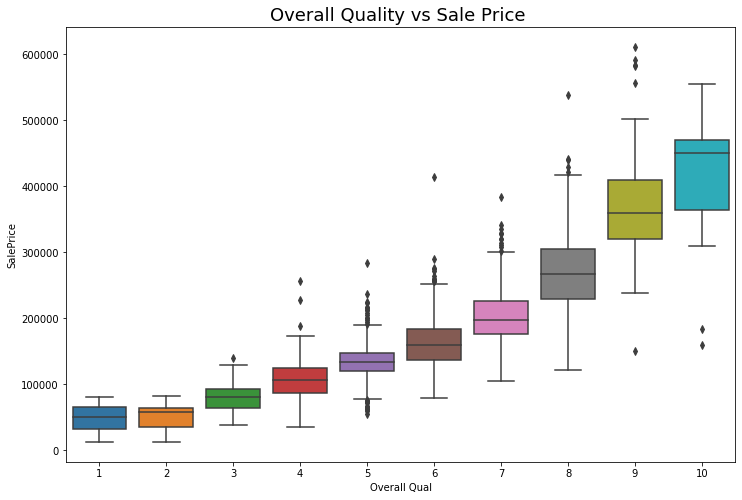

In [18]:
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x="Overall Qual", y="SalePrice", data=train_eda)
plt.title('Overall Quality vs Sale Price ', fontsize=18)

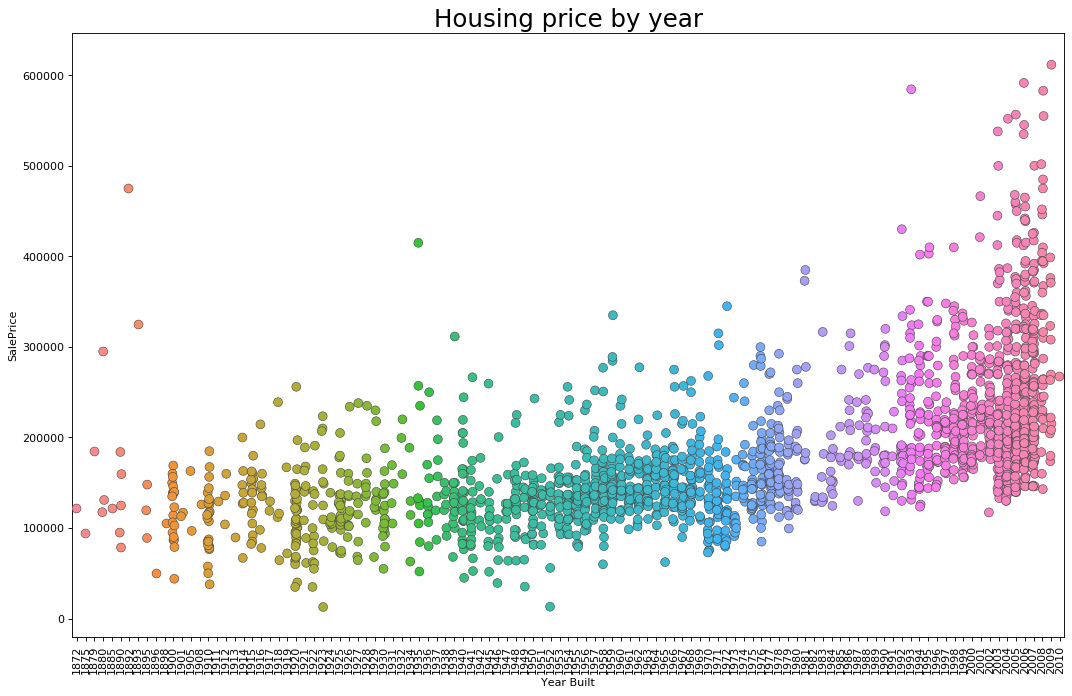

In [19]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(train_eda['Year Built'], train_eda.SalePrice, jitter=0.15, size=8, ax=ax, linewidth=.5)
plt.xticks(rotation=90) 
# Decorations
plt.title('Housing price by year', fontsize=22)
plt.show()

In [20]:
test_eda.head()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Land Contour,Neighborhood,Condition 1,Condition 2,...,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Mo Sold,Yr Sold,Sale Type
0,2658,190,RM,69,9142,Pave,Lvl,OldTown,Norm,Norm,...,Detchd,Unf,1,440,Po,Po,Y,4,2006,WD
1,2718,90,RL,69,9662,Pave,Lvl,Sawyer,Norm,Norm,...,Attchd,Fin,2,580,TA,TA,Y,8,2006,WD
2,2414,60,RL,58,17104,Pave,Lvl,Gilbert,Norm,Norm,...,Attchd,RFn,2,426,TA,TA,Y,9,2006,New
3,1989,30,RM,60,8520,Pave,Lvl,OldTown,Norm,Norm,...,Detchd,Unf,2,480,Fa,TA,N,7,2007,WD
4,625,20,RL,69,9500,Pave,Lvl,NAmes,Norm,Norm,...,Attchd,RFn,2,514,TA,TA,Y,7,2009,WD


In [21]:
train_eda['Street'].value_counts()

Pave    2044
Grvl       7
Name: Street, dtype: int64

In [22]:
###converting some ordinal features into numerical input to help with model 
values = {'Ex': 5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
for feature in ['Bsmt Qual', 'Bsmt Cond', 'Garage Qual', 'Fireplace Qu']:
    train_eda[feature] = train_eda[feature].map(values) 

In [23]:
## mapping same to test_eda
values = {'Ex': 5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
for feature in ['Bsmt Qual', 'Bsmt Cond', 'Garage Qual', 'Fireplace Qu']:
    test_eda[feature] = test_eda[feature].map(values) 

In [24]:
train_eda.head(2)

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Land Contour,Neighborhood,Condition 1,Condition 2,...,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,60,RL,69,13517,Pave,Lvl,Sawyer,RRAe,Norm,...,RFn,2.0,475.0,3,TA,Y,3,2010,WD,130500
1,544,60,RL,43,11492,Pave,Lvl,SawyerW,Norm,Norm,...,RFn,2.0,559.0,3,TA,Y,4,2009,WD,220000


In [25]:
values = {'Ex': 5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
for feature in ['Exter Qual', 'Heating QC', 'Kitchen Qual']:
    train_eda[feature] = train_eda[feature].map(values) 

In [26]:
## mapping same to test_eda
values = {'Ex': 5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
for feature in ['Exter Qual', 'Heating QC', 'Kitchen Qual']:
    test_eda[feature] = test_eda[feature].map(values) 

In [27]:
### looking at columns and assessing which to keep for further analysis and modeling... then dropping any unhelpful or multicolinear data that may impact results
train_eda.columns

Index(['Id', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Land Contour', 'Neighborhood', 'Condition 1', 'Condition 2',
       'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'Total Bsmt SF', 'Heating QC', 'Central Air', 'Electrical',
       'Gr Liv Area', 'Bsmt Full Bath', 'Full Bath', 'Half Bath',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Finish',
       'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Mo Sold', 'Yr Sold', 'Sale Type', 'SalePrice'],
      dtype='object')

In [28]:
train_eda.head()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Land Contour,Neighborhood,Condition 1,Condition 2,...,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,60,RL,69,13517,Pave,Lvl,Sawyer,RRAe,Norm,...,RFn,2.0,475.0,3,TA,Y,3,2010,WD,130500
1,544,60,RL,43,11492,Pave,Lvl,SawyerW,Norm,Norm,...,RFn,2.0,559.0,3,TA,Y,4,2009,WD,220000
2,153,20,RL,68,7922,Pave,Lvl,NAmes,Norm,Norm,...,Unf,1.0,246.0,3,TA,Y,1,2010,WD,109000
3,318,60,RL,73,9802,Pave,Lvl,Timber,Norm,Norm,...,Fin,2.0,400.0,3,TA,Y,4,2010,WD,174000
4,255,50,RL,82,14235,Pave,Lvl,SawyerW,Norm,Norm,...,Unf,2.0,484.0,3,TA,N,3,2010,WD,138500


In [29]:
train_eda['MS Zoning'].value_counts()

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64

In [30]:
train_eda['Land Contour'].value_counts()

Lvl    1843
HLS      85
Bnk      80
Low      43
Name: Land Contour, dtype: int64

In [31]:
train_eda['Heating QC'].value_counts()

5    1065
3     597
4     319
2      67
1       3
Name: Heating QC, dtype: int64

In [32]:
test_eda['Central Air'] = [1 if i == 'Y' else 0 for i in test_eda['Central Air']]
train_eda['Central Air'] = [1 if i == 'Y' else 0 for i in train_eda['Central Air']]

In [33]:
train_eda['Half Bath'].value_counts()

0    1308
1     725
2      18
Name: Half Bath, dtype: int64

In [34]:
train_eda['Half Bath'].value_counts()

0    1308
1     725
2      18
Name: Half Bath, dtype: int64

In [35]:
test_eda['Half Bath'] = test_eda['Half Bath'] * .5
train_eda['Half Bath'] = train_eda['Half Bath'] * .5

In [36]:
train_eda['Half Bath'].value_counts()

0.0    1308
0.5     725
1.0      18
Name: Half Bath, dtype: int64

In [37]:
train_eda['total bath'] = train_eda['Half Bath'] + train_eda['Bsmt Full Bath'] + train_eda['Full Bath']
test_eda['total bath'] = test_eda['Half Bath'] + test_eda['Bsmt Full Bath'] + test_eda['Full Bath']

In [38]:
train_eda['total sf'] = train_eda['Gr Liv Area'] + train_eda['Total Bsmt SF'] + train_eda['Garage Area']
test_eda['total sf'] = test_eda['Gr Liv Area'] + test_eda['Total Bsmt SF'] + test_eda['Garage Area']

In [39]:
train_eda.head(2)

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Land Contour,Neighborhood,Condition 1,Condition 2,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Mo Sold,Yr Sold,Sale Type,SalePrice,total bath,total sf
0,109,60,RL,69,13517,Pave,Lvl,Sawyer,RRAe,Norm,...,475.0,3,TA,Y,3,2010,WD,130500,2.5,2679.0
1,544,60,RL,43,11492,Pave,Lvl,SawyerW,Norm,Norm,...,559.0,3,TA,Y,4,2009,WD,220000,3.5,3594.0


In [40]:
values = {'Fin': 5, 'RFn':4, 'Unf':3, 'Fa':2, 'Po':1, 'NA':0}
for feature in ['Fireplace Qu']:
    test_eda[feature] = test_eda[feature].map(values) 
    train_eda[feature] = train_eda[feature].map(values)

In [41]:
values = {'Fin': 3, 'RFn':2, 'Unf':1, 'NA':0}
for feature in ['Garage Finish']:
    test_eda[feature] = test_eda[feature].map(values) 
    train_eda[feature] = train_eda[feature].map(values)

In [42]:
train_eda.head()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Land Contour,Neighborhood,Condition 1,Condition 2,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Mo Sold,Yr Sold,Sale Type,SalePrice,total bath,total sf
0,109,60,RL,69,13517,Pave,Lvl,Sawyer,RRAe,Norm,...,475.0,3,TA,Y,3,2010,WD,130500,2.5,2679.0
1,544,60,RL,43,11492,Pave,Lvl,SawyerW,Norm,Norm,...,559.0,3,TA,Y,4,2009,WD,220000,3.5,3594.0
2,153,20,RL,68,7922,Pave,Lvl,NAmes,Norm,Norm,...,246.0,3,TA,Y,1,2010,WD,109000,2.0,2360.0
3,318,60,RL,73,9802,Pave,Lvl,Timber,Norm,Norm,...,400.0,3,TA,Y,4,2010,WD,174000,2.5,2228.0
4,255,50,RL,82,14235,Pave,Lvl,SawyerW,Norm,Norm,...,484.0,3,TA,N,3,2010,WD,138500,2.0,2605.0


In [43]:
train_eda.drop(['MS SubClass', 'MS Zoning', 'Street', 'Land Contour','Condition 1', 'Condition 2',
       'Bldg Type', 'House Style', 'Overall Cond', 'Mas Vnr Type', 'Exter Cond', 'Bsmt Exposure', 
        'BsmtFin Type 1', 'BsmtFin SF 1', 'Electrical', 'Bsmt Full Bath', 'Full Bath', 'Half Bath',
        'Kitchen AbvGr','Fireplace Qu', 'Garage Cond', 'Sale Type'], axis=1, inplace=True)

In [44]:
test_eda.drop(['MS SubClass', 'MS Zoning', 'Street', 'Land Contour','Condition 1', 'Condition 2',
       'Bldg Type', 'House Style', 'Overall Cond', 'Mas Vnr Type', 'Exter Cond', 'Bsmt Exposure', 
        'BsmtFin Type 1', 'BsmtFin SF 1', 'Electrical', 'Bsmt Full Bath', 'Full Bath', 'Half Bath',
        'Kitchen AbvGr','Fireplace Qu' 'Garage Cond', 'Sale Type' ], axis=1, inplace=True)

In [45]:
train_eda.columns

Index(['Id', 'Lot Frontage', 'Lot Area', 'Neighborhood', 'Overall Qual',
       'Year Built', 'Year Remod/Add', 'Exterior 1st', 'Exterior 2nd',
       'Exter Qual', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Total Bsmt SF',
       'Heating QC', 'Central Air', 'Gr Liv Area', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Garage Qual', 'Paved Drive', 'Mo Sold', 'Yr Sold', 'SalePrice',
       'total bath', 'total sf'],
      dtype='object')

In [46]:
values = {'Y': 3, 'P':2, 'N':1}
for feature in ['Paved Drive']:
    test_eda[feature] = test_eda[feature].map(values) 
    train_eda[feature] = train_eda[feature].map(values)

In [47]:
train_eda.head()

,Id,Lot Frontage,Lot Area,Neighborhood,Overall Qual,Year Built,Year Remod/Add,Exterior 1st,Exterior 2nd,Exter Qual,...,Garage Finish,Garage Cars,Garage Area,Garage Qual,Paved Drive,Mo Sold,Yr Sold,SalePrice,total bath,total sf
0,109,69,13517,Sawyer,6,1976,2005,HdBoard,Plywood,4,...,2,2.0,475.0,3,3,3,2010,130500,2.5,2679.0
1,544,43,11492,SawyerW,7,1996,1997,VinylSd,VinylSd,4,...,2,2.0,559.0,3,3,4,2009,220000,3.5,3594.0
2,153,68,7922,NAmes,5,1953,2007,VinylSd,VinylSd,3,...,1,1.0,246.0,3,3,1,2010,109000,2.0,2360.0
3,318,73,9802,Timber,5,2006,2007,VinylSd,VinylSd,3,...,3,2.0,400.0,3,3,4,2010,174000,2.5,2228.0
4,255,82,14235,SawyerW,6,1900,1993,Wd Sdng,Plywood,3,...,1,2.0,484.0,3,1,3,2010,138500,2.0,2605.0


In [48]:
train_eda['age'] = train_eda['Yr Sold'] - train_eda['Year Built']

In [49]:
test_eda['age'] = test_eda['Yr Sold'] - test_eda['Year Built']

In [50]:
test_eda.head()

,Id,Lot Frontage,Lot Area,Neighborhood,Overall Qual,Year Built,Year Remod/Add,Exterior 1st,Exterior 2nd,Exter Qual,...,Garage Finish,Garage Cars,Garage Area,Garage Qual,Paved Drive,Mo Sold,Yr Sold,total bath,total sf,age
0,2658,69,9142,OldTown,6,1910,1950,AsbShng,AsbShng,3,...,1,1,440,1,3,4,2006,2.0,3388,96
1,2718,69,9662,Sawyer,5,1977,1977,Plywood,Plywood,3,...,3,2,580,3,3,8,2006,2.0,4514,29
2,2414,58,17104,Gilbert,7,2006,2006,VinylSd,VinylSd,4,...,2,2,426,3,3,9,2006,3.5,2576,0
3,1989,60,8520,OldTown,5,1923,2006,Wd Sdng,Wd Sdng,4,...,1,2,480,2,1,7,2007,1.0,2416,84
4,625,69,9500,NAmes,6,1963,1963,Plywood,Plywood,3,...,2,2,514,3,3,7,2009,2.5,3302,46


In [51]:
train_eda.isna().sum().sum()

2051

In [52]:
test_eda.isna().sum().sum()

878

In [53]:
train_eda.drop(['Garage Type'], axis=1, inplace=True)
test_eda.drop(['Garage Type'], axis=1, inplace=True)

In [54]:
train_eda.shape

(2051, 33)

In [55]:
test_eda.shape

(878, 32)

In [59]:
vals = {
'NridgHt':10,
'NoRidge':8,
'StoneBr':7,
'Somerst':6,
'Timber':5,
'Veenker':4,
'CollgCr':4,
'Crawfor':4,
'ClearCr':4,
'GrnHill':3,
'NWAmes':3,
'Blmngtn':2,
'Gilbert':2,
'SawyerW':2,
'Greens':1,
'Landmrk':0,
'Blueste':0,
'Mitchel':0,
'NPkVill':0,
'SWISU':0,
'BrDale':0,
'MeadowV':0,
'Sawyer':0,
'BrkSide':0,
'Edwards':0,
'IDOTRR':0,
'NAmes':0,
'OldTown':0
}
for feature in ['Neighborhood']:
    train_eda[feature] = train_eda[feature].map(vals) 

In [57]:
train_eda.to_csv('datasets/train_polished.csv', index=False)
test_eda.to_csv('datasets/test_polished.csv', index=False)